In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=dataset.iloc[:,3:5]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
from sklearn.cluster import Birch
birch_model=Birch(n_clusters=4,threshold=1.5)
birch_model.fit(x)
pred=birch_model.predict(x)

C:\Users\edwin\anaconda3\envs\MonicaAI\lib\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


In [5]:
supervised=dataset
supervised['Cluster_group']=pred
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [6]:
supervised.to_csv("BIRCH Cluster.csv",index=False)

C:\Users\edwin\anaconda3\envs\MonicaAI\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


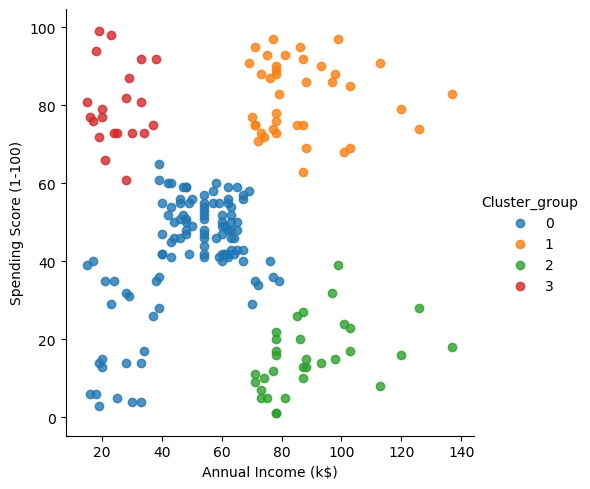

In [7]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend_out=True)

In [8]:
cluster=len(np.unique(pred))
from sklearn.metrics import silhouette_score
score=silhouette_score(x,pred,sample_size=1000,random_state=42)
print(f"cluster size={cluster},Score={score}")

cluster size=4,Score=0.4916598193892782
